In [23]:
!pip install pandas numpy seaborn scikit-learn matplotlib

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Enable inline plotting
%matplotlib inline

In [24]:
import pandas as pd

# Load train and test datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [25]:
print("Train Dataset:")
display(train_df.head())

print("\nTest Dataset:")
display(test_df.head())

Train Dataset:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied



Test Dataset:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [26]:
print("\nTrain Dataset Info:")
train_df.info()

print("\nTest Dataset Info:")
test_df.info()


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location     

In [27]:
print("Missing Values in Train Dataset:")
print(train_df.isnull().sum())

print("\nMissing Values in Test Dataset:")
print(test_df.isnull().sum())

Missing Values in Train Dataset:
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes

In [28]:
train_df["Arrival Delay in Minutes"].fillna(train_df["Arrival Delay in Minutes"].median(), inplace=True)
test_df["Arrival Delay in Minutes"].fillna(test_df["Arrival Delay in Minutes"].median(), inplace=True)

# Verify missing values are handled
print("Missing Values After Handling:")
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Missing Values After Handling:
Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                     

<ipython-input-28-924fc0ef9db6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Arrival Delay in Minutes"].fillna(train_df["Arrival Delay in Minutes"].median(), inplace=True)
<ipython-input-28-924fc0ef9db6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [29]:
train_df.drop(columns=["Unnamed: 0", "id"], inplace=True)
test_df.drop(columns=["Unnamed: 0", "id"], inplace=True)

# Verify the changes
print("Columns after dropping:")
print(train_df.columns)

Columns after dropping:
Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [30]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for binary categorical variables
label_encoders = {}
binary_cols = ["Gender", "Customer Type", "Type of Travel", "satisfaction"]

for col in binary_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le  # Store encoders for later use

# One-hot encoding for "Class" column
train_df = pd.get_dummies(train_df, columns=["Class"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["Class"], drop_first=True)

# Verify changes
print("Data after encoding:")
print(train_df.head())

Data after encoding:
   Gender  Customer Type  Age  Type of Travel  Flight Distance  \
0       1              0   13               1              460   
1       1              1   25               0              235   
2       0              0   26               0             1142   
3       0              0   25               0              562   
4       1              0   61               0              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  ...  \
0                       3              1               5  ...   
1                       3              3               1  ...   
2       

In [31]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
num_cols = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]


scaler = StandardScaler()

# Fit and transform numerical columns in train data
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])

# Transform the test data using the same scaler
test_df[num_cols] = scaler.transform(test_df[num_cols])

# Verify changes
print("Data after scaling:")
print(train_df.head())

Data after scaling:
   Gender  Customer Type       Age  Type of Travel  Flight Distance  \
0       1              0 -1.745279               1        -0.731539   
1       1              1 -0.951360               0        -0.957184   
2       0              0 -0.885200               0        -0.047584   
3       0              0 -0.951360               0        -0.629246   
4       1              0  1.430397               0        -0.978244   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  ...  \
0                       3              1               5  ...   
1                       3              3    

In [32]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = train_df.drop(columns=["satisfaction"])  # Features
y = train_df["satisfaction"]  # Target variable

# Split into training and validation sets (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)


Training set shape: (83123, 23) (83123,)
Validation set shape: (20781, 23) (20781,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression model
log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(X_train, y_train)

# Make predictions on validation data
y_pred = log_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))



Logistic Regression Accuracy: 0.8764

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11776
           1       0.87      0.84      0.86      9005

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781


Confusion Matrix:
[[10635  1141]
 [ 1427  7578]]


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on validation data
y_pred_rf = rf_model.predict(X_val)

# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_rf))

Random Forest Accuracy: 0.9618

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781


Confusion Matrix:
[[11485   291]
 [  503  8502]]


In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model (using k=5 neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on validation data
y_pred_knn = knn_model.predict(X_val)

# Evaluate the model
accuracy_knn = accuracy_score(y_val, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_knn))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_knn))



KNN Accuracy: 0.9299

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     11776
           1       0.94      0.90      0.92      9005

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781


Confusion Matrix:
[[11238   538]
 [  918  8087]]


In [37]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on validation data
y_pred_nb = nb_model.predict(X_val)

# Evaluate the model
accuracy_nb = accuracy_score(y_val, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_nb))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_nb))


Naive Bayes Accuracy: 0.8614

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     11776
           1       0.86      0.82      0.84      9005

    accuracy                           0.86     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.86      0.86      0.86     20781


Confusion Matrix:
[[10540  1236]
 [ 1644  7361]]


In [38]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on validation data
y_pred_gb = gb_model.predict(X_val)

# Evaluate the model
accuracy_gb = accuracy_score(y_val, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_gb))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_gb))


Gradient Boosting Accuracy: 0.9417

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11776
           1       0.94      0.92      0.93      9005

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781


Confusion Matrix:
[[11260   516]
 [  696  8309]]


In [39]:
from sklearn.svm import SVC

# Initialize SVM model with RBF kernel
svm_rbf_model = SVC(kernel="rbf", C=1.0, gamma="scale")  # Default gamma="scale" adapts to data

# Train the model
svm_rbf_model.fit(X_train, y_train)

# Make predictions on validation data
y_pred_svm_rbf = svm_rbf_model.predict(X_val)

# Evaluate the model
accuracy_svm_rbf = accuracy_score(y_val, y_pred_svm_rbf)
print(f"SVM (RBF Kernel) Accuracy: {accuracy_svm_rbf:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_svm_rbf))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_svm_rbf))


SVM (RBF Kernel) Accuracy: 0.9434

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11776
           1       0.94      0.93      0.93      9005

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781


Confusion Matrix:
[[11274   502]
 [  674  8331]]


In [40]:
from mlxtend.evaluate import paired_ttest_5x2cv
import numpy as np

# Perform 5x2 cross-validated paired t-test
t, p = paired_ttest_5x2cv(
    estimator1=RandomForestClassifier(n_estimators=100, random_state=42),
    estimator2=LogisticRegression(max_iter=1000),
    X=X_train,
    y=y_train,
    scoring="accuracy",
    random_seed=42
)

print(f"P-value: {p:.3f}, t-Statistic: {t:.3f}")

# Interpretation
if p <= 0.05:
    print("There is a significant difference between Random Forest and Logistic Regression.")
else:
    print("There is NO significant difference between Random Forest and Logistic Regression.")


P-value: 0.000, t-Statistic: 50.129
There is a significant difference between Random Forest and Logistic Regression.


In [41]:
import pickle

# Save the trained model to a file
with open("final_random_forest_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Model saved successfully!")


Model saved successfully!


In [42]:
# Ensure test data preprocessing matches training data
X_test = test_df.drop(columns=["satisfaction"])  # Remove target column if it exists

# Make predictions using the trained Random Forest model
test_predictions = rf_model.predict(X_test)

# Convert predictions to a DataFrame
submission = pd.DataFrame({"id": test_df.index, "satisfaction": test_predictions})

# Save predictions to a CSV file
submission.to_csv("final_predictions.csv", index=False)

print("Predictions saved successfully!")


Predictions saved successfully!


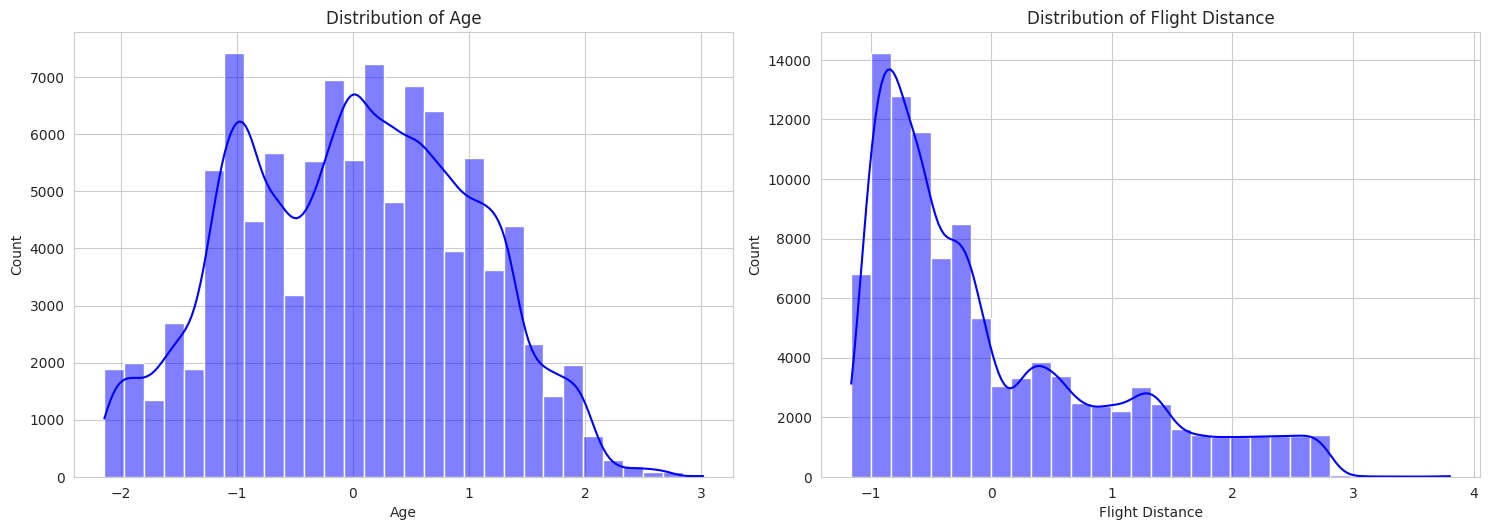

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("whitegrid")

# List of numerical features
num_features = ["Age", "Flight Distance"]

# Plot histograms & KDE for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(train_df[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()



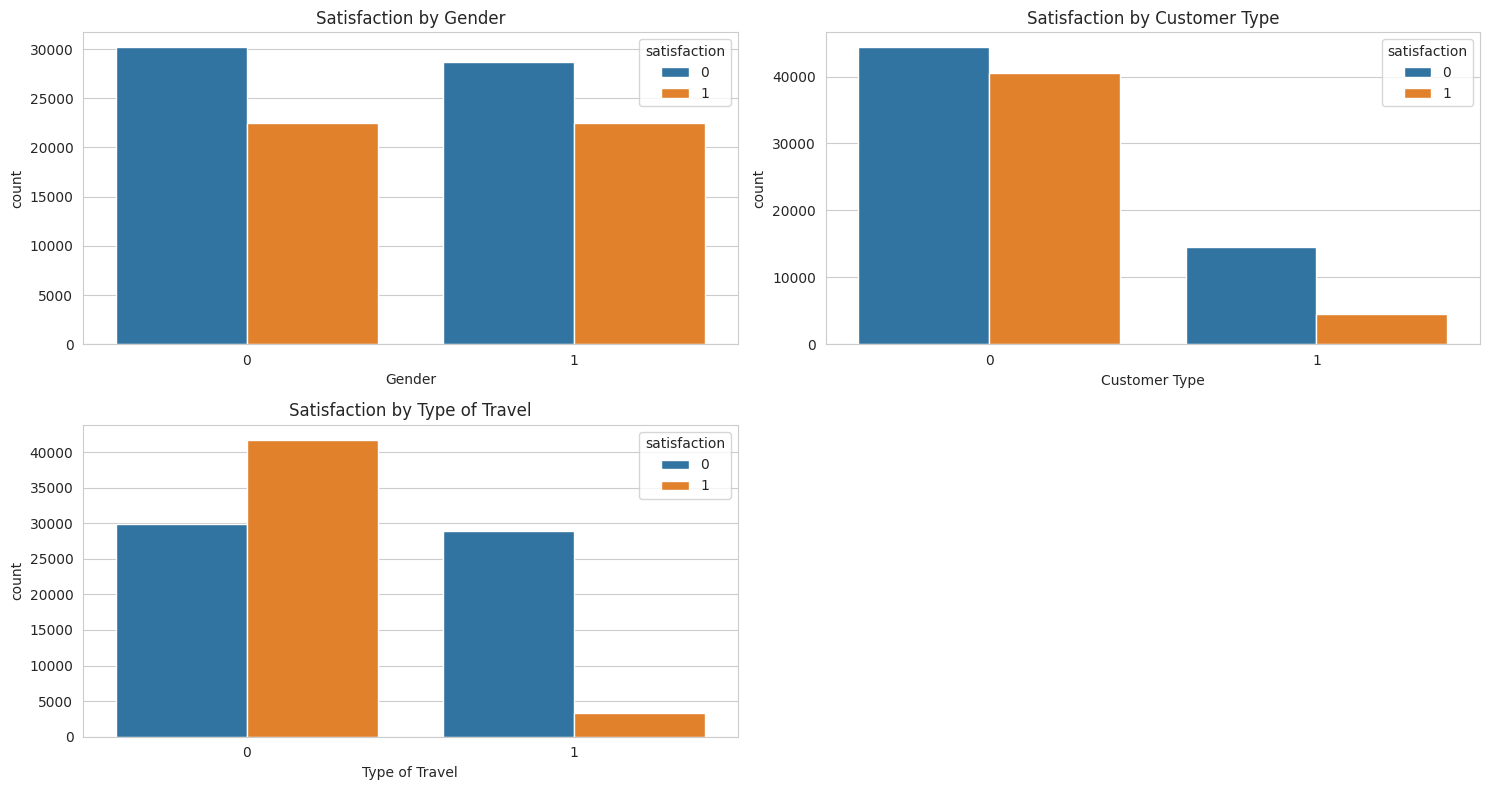

In [51]:
# Countplot for categorical features affecting satisfaction
plt.figure(figsize=(15, 8))

# Gender vs Satisfaction
plt.subplot(2, 2, 1)
sns.countplot(x="Gender", hue="satisfaction", data=train_df)
plt.title("Satisfaction by Gender")

# Customer Type vs Satisfaction
plt.subplot(2, 2, 2)
sns.countplot(x="Customer Type", hue="satisfaction", data=train_df)
plt.title("Satisfaction by Customer Type")

# Type of Travel vs Satisfaction
plt.subplot(2, 2, 3)
sns.countplot(x="Type of Travel", hue="satisfaction", data=train_df)
plt.title("Satisfaction by Type of Travel")



plt.tight_layout()
plt.show()


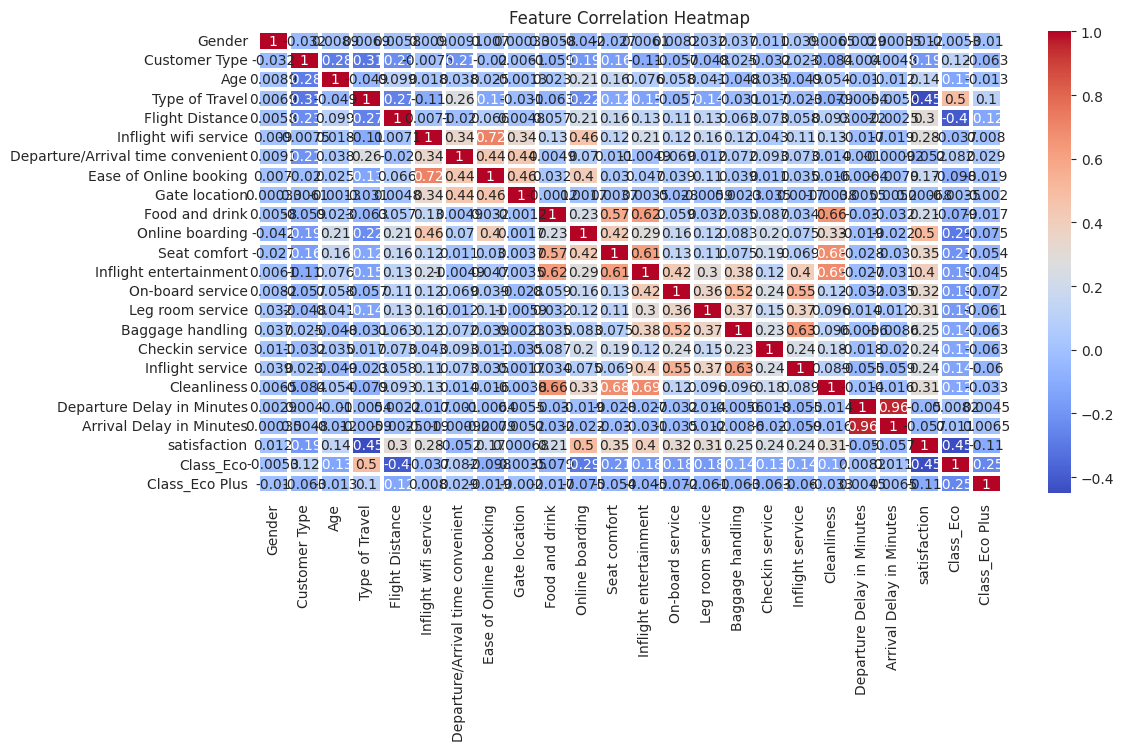

In [56]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", linewidths=1.5)
plt.title("Feature Correlation Heatmap")
plt.show()
